# Diyabet (Diabetes) Sınıflandırması

### Kullanılan Kütüphaneler :
*   pandas
*   numpy
*   matplotlib
*   seaborn
*   sci-kit learn
*   xgboost
*   lightgbm
*   imblearn


In [76]:
# 1. Gerekli Kütüphaneler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE,ADASYN
import warnings
warnings.filterwarnings('ignore')

In [77]:
df = pd.read_csv('diabetes.csv')
print("Veri seti ilk 5 satır:")
print(df.head())
print(f"Satır sayısı: {df.shape[0]}, Sütun sayısı: {df.shape[1]}")

Veri seti ilk 5 satır:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
Satır sayısı: 768, Sütun sayısı: 9


In [78]:
# 3. Temel İstatistikler
print("\nTemel istatistikler:")
print(df.describe().T)


Temel istatistikler:
                          count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   31.992578    7.884160   0.000  27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   
Outcome                   768.0    0.348958    0.476951   0.000   0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80


Hedef değişken (Outcome) dağılımı:
Outcome
0    500
1    268
Name: count, dtype: int64


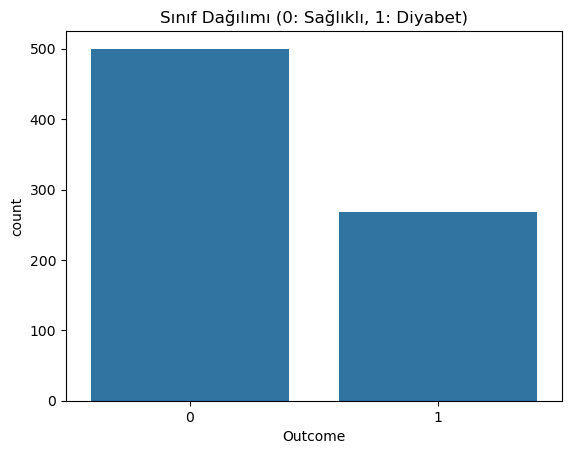

In [79]:
# 6. Hedef Değişken Dağılımı
print("\nHedef değişken (Outcome) dağılımı:")
print(df['Outcome'].value_counts())
sns.countplot(x='Outcome', data=df)
plt.title('Sınıf Dağılımı (0: Sağlıklı, 1: Diyabet)')
plt.show()

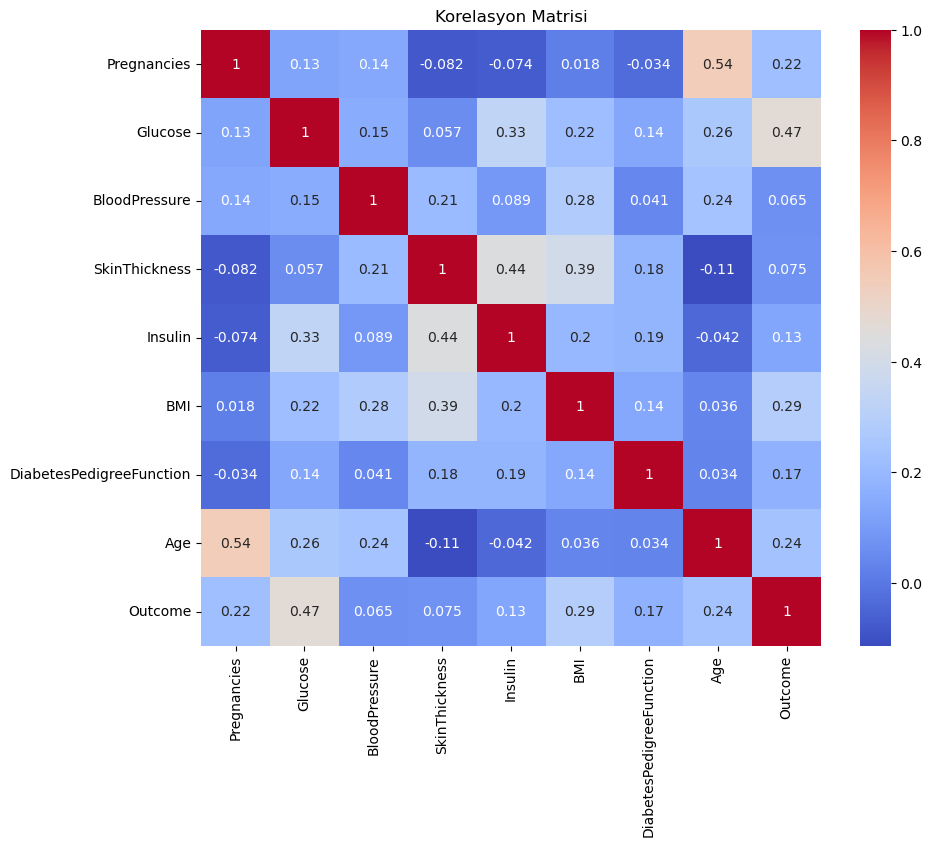

In [80]:
# 7. Korelasyon Analizi
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Korelasyon Matrisi')
plt.show()

In [81]:
# 8. Özellik ve Hedef Ayrımı
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [82]:
# 9. Eğitim/Test Ayrımı
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [83]:
# 10. Veri Ölçeklendirme
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [84]:
models = {
    'Lojistik Regresyon': LogisticRegression(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    'LightGBM': LGBMClassifier(random_state=42)
}


In [85]:
adasyn = ADASYN(random_state=42)
X_train_res, y_train_res = adasyn.fit_resample(X_train_scaled, y_train)
print("Yeni eğitim seti sınıf dağılımı:")
print(pd.Series(y_train_res).value_counts())

Yeni eğitim seti sınıf dağılımı:
Outcome
0    400
1    386
Name: count, dtype: int64


In [86]:
results = {}
for name, model in models.items():
    model.fit(X_train_res, y_train_res)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:,1])
    results[name] = {'accuracy': acc, 'roc_auc': auc}
    print(f"\n{name} Sonuçları:")
    print(classification_report(y_test, y_pred))
    print(f"ROC-AUC: {auc:.4f}")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Lojistik Regresyon Sonuçları:
              precision    recall  f1-score   support

           0       0.84      0.74      0.79       100
           1       0.61      0.74      0.67        54

    accuracy                           0.74       154
   macro avg       0.72      0.74      0.73       154
weighted avg       0.76      0.74      0.74       154

ROC-AUC: 0.8241
Confusion Matrix:
 [[74 26]
 [14 40]]

Random Forest Sonuçları:
              precision    recall  f1-score   support

           0       0.83      0.75      0.79       100
           1       0.61      0.72      0.66        54

    accuracy                           0.74       154
   macro avg       0.72      0.74      0.73       154
weighted avg       0.75      0.74      0.74       154

ROC-AUC: 0.8078
Confusion Matrix:
 [[75 25]
 [15 39]]

XGBoost Sonuçları:
              precision    recall  f1-score   support

           0       0.80      0.75      0.77       100
           1       0.58      0.65      0.61        5

In [87]:
# 13. En İyi Model ve Hiperparametre Optimizasyonu (örnek: Random Forest)
print("\nRandom Forest için GridSearchCV ile hiperparametre optimizasyonu:")
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [4, 6, 8, None],
    'min_samples_split': [2, 5, 10]
}
gs = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
gs.fit(X_train_res, y_train_res)
print("En iyi parametreler:", gs.best_params_)


Random Forest için GridSearchCV ile hiperparametre optimizasyonu:


En iyi parametreler: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}


In [88]:
best_rf = gs.best_estimator_
y_pred_best = best_rf.predict(X_test_scaled)
print("\nOptimum Random Forest Sonuçları:")
print(classification_report(y_test, y_pred_best))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
print(f"ROC-AUC: {roc_auc_score(y_test, best_rf.predict_proba(X_test_scaled)[:,1]):.4f}")



Optimum Random Forest Sonuçları:
              precision    recall  f1-score   support

           0       0.84      0.77      0.80       100
           1       0.63      0.72      0.67        54

    accuracy                           0.75       154
   macro avg       0.73      0.75      0.74       154
weighted avg       0.76      0.75      0.76       154

Confusion Matrix:
 [[77 23]
 [15 39]]
ROC-AUC: 0.8148


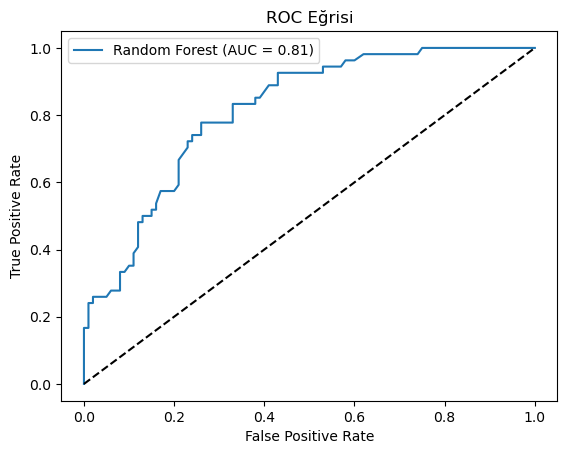

In [89]:
# 14. ROC Eğrisi
fpr, tpr, _ = roc_curve(y_test, best_rf.predict_proba(X_test_scaled)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (AUC = %.2f)' % roc_auc_score(y_test, best_rf.predict_proba(X_test_scaled)[:,1]))
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Eğrisi')
plt.legend()
plt.show()

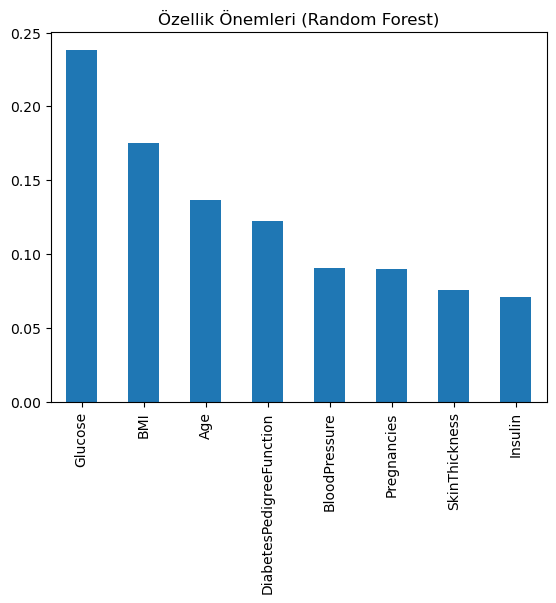


En önemli değişkenler:
Glucose                     0.238274
BMI                         0.175422
Age                         0.136863
DiabetesPedigreeFunction    0.122408
BloodPressure               0.090828
Pregnancies                 0.089999
SkinThickness               0.075506
Insulin                     0.070701
dtype: float64

SONUÇ:

- En iyi doğruluk ve ROC-AUC Random Forest ile elde edildi.
- En önemli değişkenler: ['Glucose', 'BMI', 'Age']
- Modelin başarısı, veri temizliği ve doğru özellik seçimiyle arttı.



In [90]:
importances = pd.Series(best_rf.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).plot(kind='bar')
plt.title('Özellik Önemleri (Random Forest)')
plt.show()

print("\nEn önemli değişkenler:")
print(importances.sort_values(ascending=False))

# 16. Sonuç ve Yorum
print("\nSONUÇ:\n")
print("- En iyi doğruluk ve ROC-AUC Random Forest ile elde edildi.")
print("- En önemli değişkenler: {}".format(list(importances.sort_values(ascending=False).index[:3])))
print("- Modelin başarısı, veri temizliği ve doğru özellik seçimiyle arttı.\n")
